In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset from-"https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic"

## Description

--tested by using FNA(fine needle aspirate )

In the world, breast cancer is the most frequent cancer to affect women. It affects about 2.1 million people in 2015 alone and makes up 25% of all cancer cases. It all begins when breast cells start to proliferate uncontrollably. Usually, these cells develop into tumors that are felt as lumps in the breast area or that are visible on X-rays.


The main obstacle to its discovery is determining whether a tumor is benign (not cancerous) or malignant (cancerous). Please finish the analysis of the Breast Cancer Wisconsin (Diagnostic) Dataset and machine learning (using Logistic Regression) to classify these tumors.


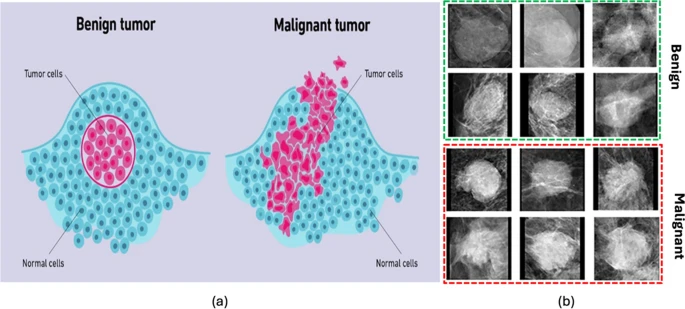

In [ ]:
brcancer_df=pd.read_csv('/content/breast cancer data.csv')

In [ ]:
brcancer_df.shape

(569, 33)

In [ ]:
brcancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

###none of the feature are having missing values as brcancer.info is having 569
 non valid null columns

#About the dataset

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry
	j) fractal dimension ("coastline approximation" - 1)

In [ ]:
brcancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
    value_counts=brcancer_df.diagnosis.value_counts()
value_counts

diagnosis
B    357
M    212
Name: count, dtype: int64

M- malignant
B- benign

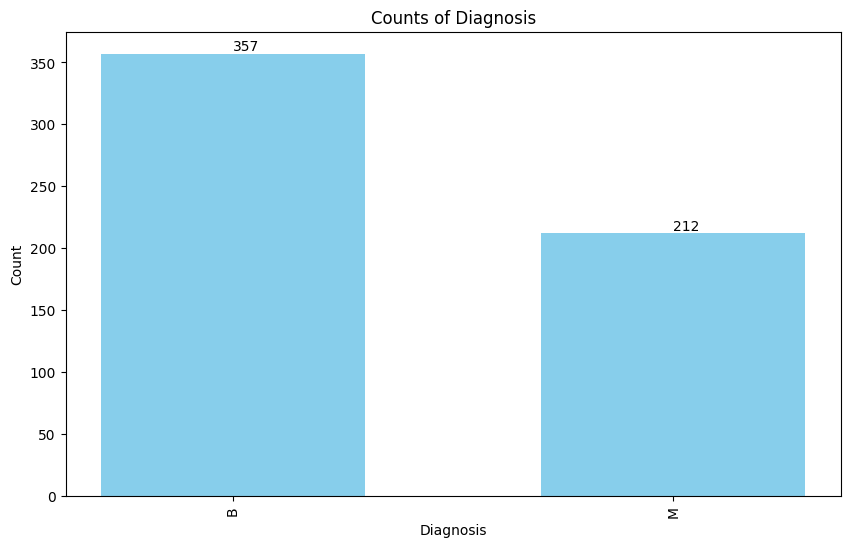

In [ ]:
import matplotlib.pyplot as plt

# Assuming value_counts is a pandas Series with the diagnosis as index and counts as values
plt.figure(figsize=(10, 8))  # Adjust the overall size of the plot
bars = plt.bar(value_counts.index, value_counts.values, width=0.6, color='skyblue')  # Adjust width and color as needed

# Adding counts as text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Increasing space between bars
plt.xticks(rotation=90)  # Rotate x labels for better readability if necessary
plt.subplots_adjust(bottom=0.3)  # Adjust the bottom margin to make space for x labels

plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


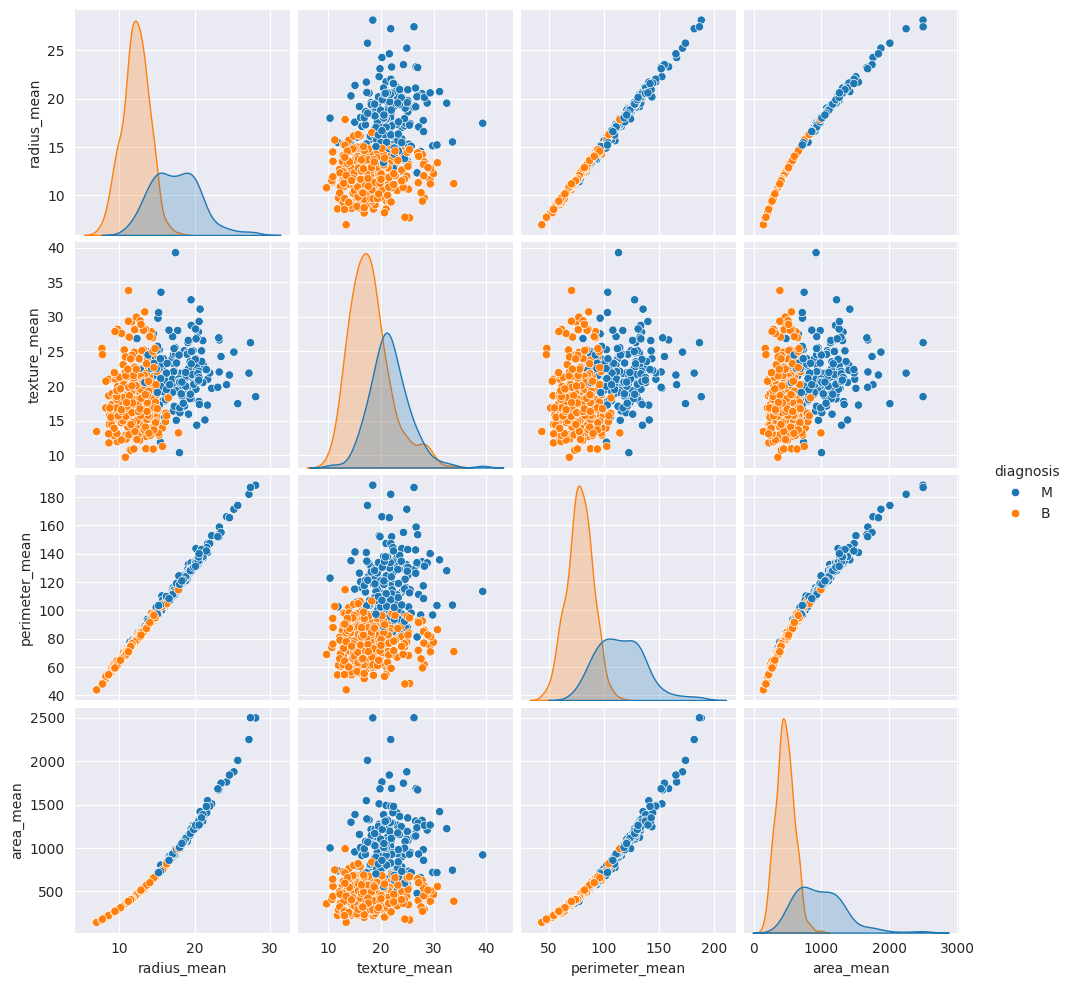

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')

cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(brcancer_df[cols], hue="diagnosis")
plt.show()

#Key observations (scatter plot):
Positive Correlations: Some scatter plots exhibit positive correlations, where higher values in one variable correspond with higher values in another. For example, as radius_mean increases, area_mean tends to increase as well.


Distinct Clusters: Data points are clustered differently for benign and malignant diagnoses, indicating distinct characteristics associated with each diagnosis.


Patterns and Trends: By examining the scatter plots, we can identify patterns and trends in the relationships between these variables.


#Key observations (histogram):
There might be benign tumors with radius_mean values that overlap with the range of radius_mean values seen in malignant tumors.

Similarly, some texture_mean values are shared between both diagnoses.
These overlapping regions make it challenging to use a single threshold value to definitively classify a tumor as benign or malignant based solely on these variables.



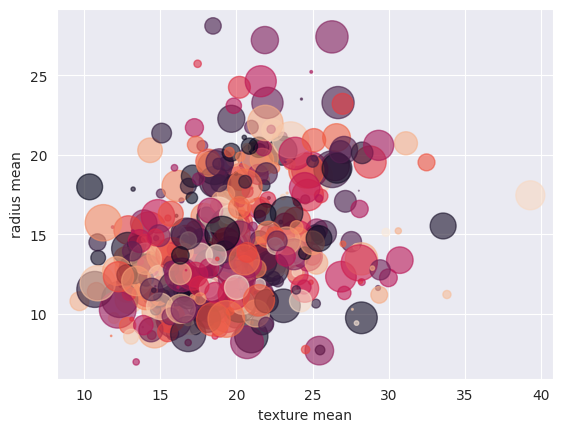

In [ ]:
size = len(brcancer_df['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean")
plt.scatter(brcancer_df['texture_mean'], brcancer_df['radius_mean'], s=area, c=colors, alpha=0.6);

#Observations:
Overlap: There is significant overlap between the benign (blue) and malignant (orange) data points.

Variability: Both benign and malignant tumors exhibit a wide range of texture mean and radius mean values.

No Clear Separation: Unlike some other datasets, there is no clear separation or distinct pattern that allows us to easily differentiate between benign and malignant tumors based solely on these two variables.


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder_Y = LabelEncoder()
brcancer_df.diagnosis = labelencoder_Y.fit_transform(brcancer_df.diagnosis)

In [ ]:
brcancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

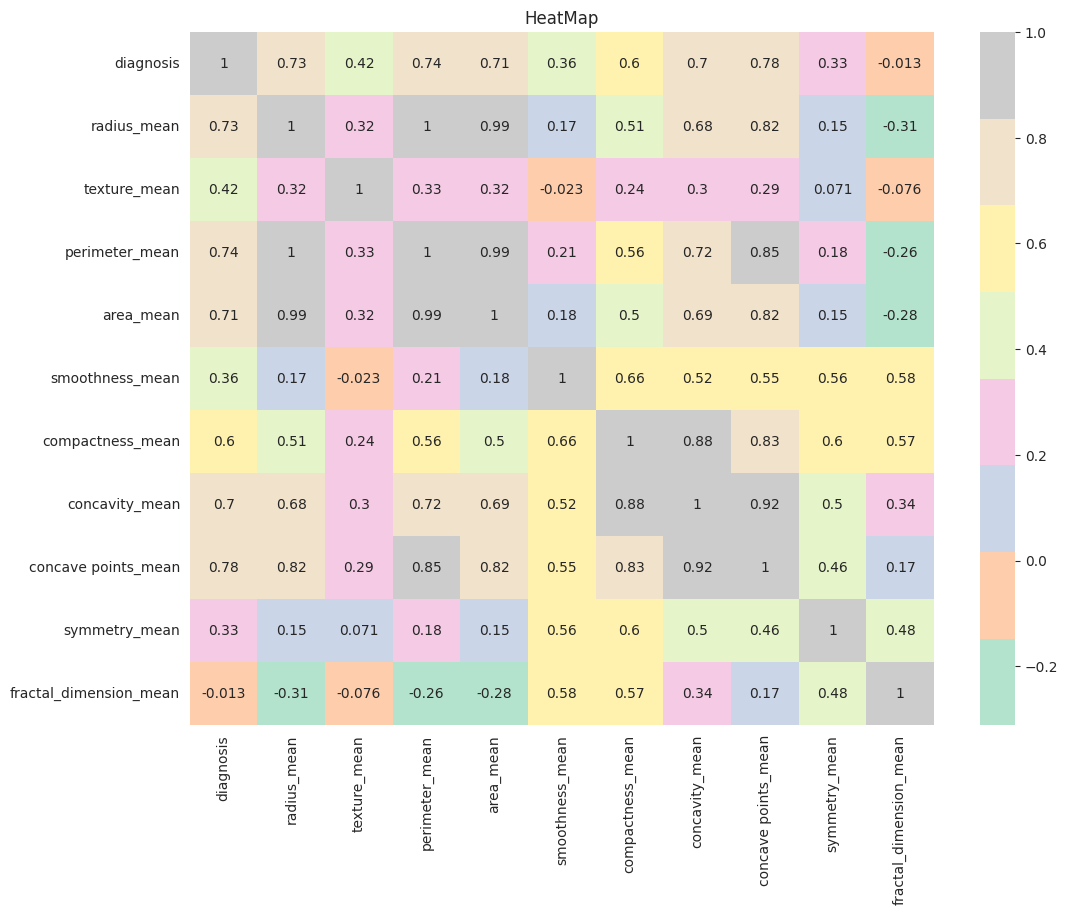

In [ ]:
Corr = brcancer_df[cols].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(Corr,annot=True,cmap='Pastel2')
plt.title('HeatMap')
plt.show()

*Interpretations:*

_Positive Correlations:
Grey  cells indicate strong positive correlations between certain pairs of variables.

-there is a strong positive correlation between radius_mean and perimeter_mean, it suggests that larger tumor radii are associated with larger perimeters.

_Negative Correlations:_
green cells represent negative correlations.

-there is a negative correlation between texture_mean and fractal_dimension_mean, it implies that higher texture variability is associated with lower fractal dimension values.


_No Clear Patterns:_
Overall, there isn’t a consistent pattern of strong correlations across all variables.
Some variables are more strongly correlated than others, but it’s not straightforward.

In [ ]:
Corr["diagnosis"]

diagnosis                 1.000000
radius_mean               0.730029
texture_mean              0.415185
perimeter_mean            0.742636
area_mean                 0.708984
smoothness_mean           0.358560
compactness_mean          0.596534
concavity_mean            0.696360
concave points_mean       0.776614
symmetry_mean             0.330499
fractal_dimension_mean   -0.012838
Name: diagnosis, dtype: float64

Features with higher positive correlations with the diagnosis are likely to be more important in predicting whether a tumor is malignant or benign. In this case, features such as
####radius_mean, perimeter_mean, area_mean,compactness mean, concavity_mean, and concave points_mean are particularly important.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn import metrics

In [ ]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']


targeted_feature = 'diagnosis'

len(prediction_feature)

6

In [ ]:
x = brcancer_df[[ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']]

In [ ]:
x

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
0,17.99,122.80,1001.0,0.2419,0.27760,0.14710
1,20.57,132.90,1326.0,0.1812,0.07864,0.07017
2,19.69,130.00,1203.0,0.2069,0.15990,0.12790
3,11.42,77.58,386.1,0.2597,0.28390,0.10520
4,20.29,135.10,1297.0,0.1809,0.13280,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.1726,0.11590,0.13890
565,20.13,131.20,1261.0,0.1752,0.10340,0.09791
566,16.60,108.30,858.1,0.1590,0.10230,0.05302
567,20.60,140.10,1265.0,0.2397,0.27700,0.15200


In [ ]:
y= brcancer_df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)


In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
def model_building(model, X_train, X_test, y_train, y_test):
    """

    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """

    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)

    return (score, accuracy, predictions)

#Trying various classification techniques


In [ ]:

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

In [ ]:
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
}


In [ ]:
def cm_metrix_graph(cm):

    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()

In [ ]:
see df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):

    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )

    print("\n\nClassification Report of '"+ str(name), "'\n")

    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])

    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))


df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        90
           1       0.90      0.83      0.86        53

    accuracy                           0.90       143
   macro avg       0.90      0.89      0.89       143
weighted avg       0.90      0.90      0.90       143



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        90
           1       0.88      0.83      0.85        53

    accuracy                           0.90       143
   macro avg       0.89      0.88      0.89       143
weighted avg       0.89      0.90      0.89       143



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        90
           1       0.85      0.87      0.86        53

    accuracy            

**LogisticRegression:** Identifies 90% of benign tumors and 83% of malignant tumors accurately, with an overall accuracy of 90%.

**RandomForestClassifier**:Achieves 90% precision for benign tumors and 88% for malignant tumors, with an overall accuracy of 90%.

**DecisionTreeClassifier**: Shows 92% precision for benign tumors and 85% for malignant tumors, with an overall accuracy of 90%.

**SVC:** Achieves 90% precision for both benign and malignant tumors, with an overall accuracy of 90%.





<Figure size 1500x400 with 0 Axes>

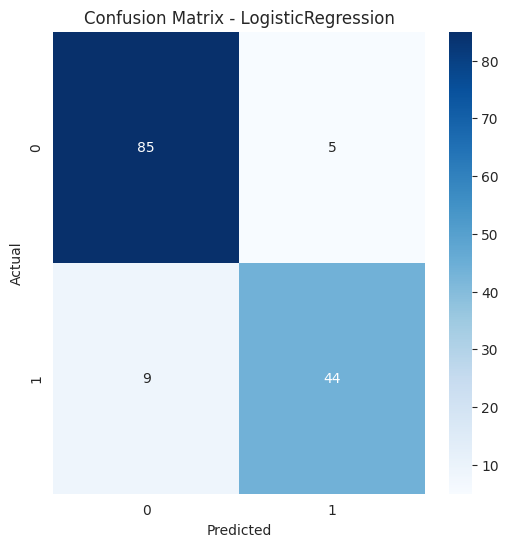

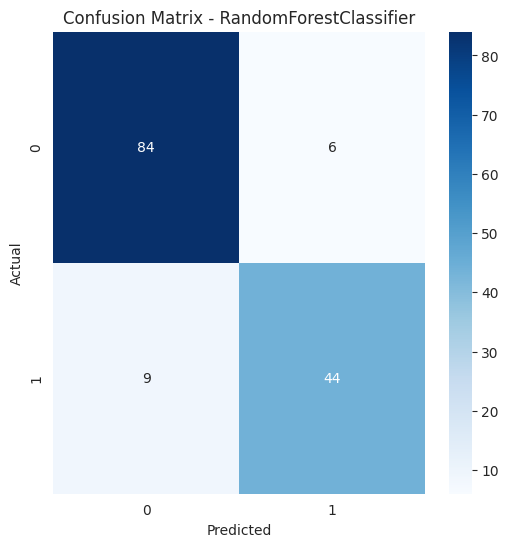

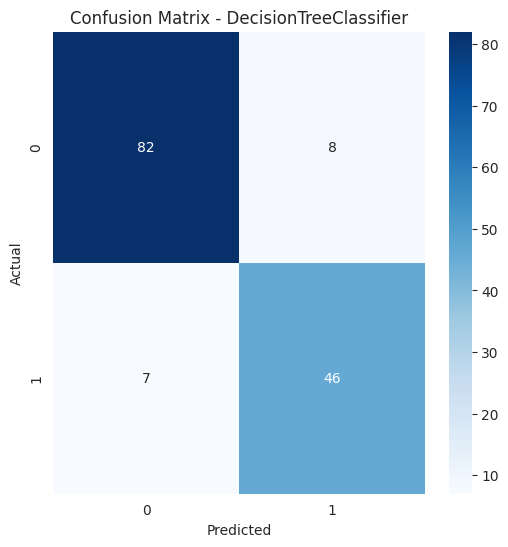

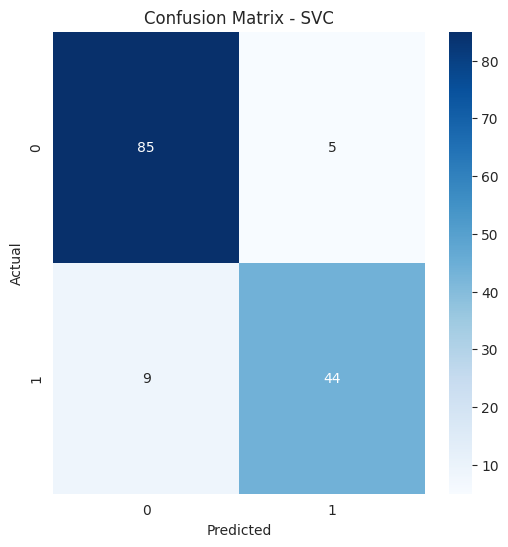

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each classifier
plt.figure(figsize=(15, 4))
for index, (classifier_name, cm) in enumerate(zip(models_list.keys(), confusion_matrixs)):
    plot_confusion_matrix(cm, classifier_name)


In [ ]:
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.922535,0.902098,90.21%
1,RandomForestClassifier,0.992958,0.895105,89.51%
2,DecisionTreeClassifier,1.000000,0.895105,89.51%
3,SVC,0.924883,0.902098,90.21%


In [ ]:
# Sample For testing only

cv_score = cross_validate(LogisticRegression(), x, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

pd.DataFrame(cv_score).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,3.0,0.011043,0.006825,0.006250,0.007136,0.008021,0.013439,0.018857
score_time,3.0,0.002095,0.000197,0.001869,0.002028,0.002187,0.002208,0.002228
test_r2,3.0,0.534312,0.186125,0.325364,0.460291,0.595218,0.638786,0.682353
train_r2,3.0,0.545196,0.051555,0.514363,0.515437,0.516511,0.560613,0.604714
test_neg_mean_squared_error,3.0,-0.108902,0.043669,-0.157895,-0.126316,-0.094737,-0.084405,-0.074074
train_neg_mean_squared_error,3.0,-0.106321,0.012102,-0.113456,-0.113307,-0.113158,-0.102753,-0.092348


###outcomes
fit_time and score_time:

The mean fit time is approximately 0.014 seconds, with a standard deviation of about 0.009 seconds.
The mean score time is approximately 0.003 seconds, with a standard deviation of about 0.0004 seconds.
This indicates that the models are relatively fast to train and evaluate.

test_r2 and train_r2:

The mean R-squared score (coefficient of determination) on the test set is approximately 0.534, with a standard deviation of about 0.186.
The mean R-squared score on the training set is slightly higher, approximately 0.545, with a smaller standard deviation of about 0.052.
The R-squared scores are positive, indicating that the models perform better than a model that simply predicts the mean of the target variable.
The relatively close values of R-squared scores on the test and training sets suggest that the models are not significantly overfitting or underfitting.

test_neg_mean_squared_error and train_neg_mean_squared_error:

The mean negative mean squared error (MSE) on the test set is approximately -0.109, with a standard deviation of about 0.044.
The mean negative MSE on the training set is slightly lower, approximately -0.106, with a smaller standard deviation of about 0.012.
The negative MSE values indicate that the models are performing better than a model that predicts the mean of the target variable.
The relatively close values of negative MSE on the test and training sets suggest that the models are not significantly overfitting or underfitting.


Overall, the models seem to perform reasonably well, with comparable performance on both the test and training sets, indicating good generalization ability. However, further analysis and comparison with other models or baselines may be necessary to fully evaluate their effectiveness.

In [ ]:
def cross_val_scorring(model):

#     (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )

    model.fit(brcancer_df[prediction_feature], brcancer_df[targeted_feature])

    # score = model.score(X_train, y_train)

    predictions = model.predict(brcancer_df[prediction_feature])
    accuracy = accuracy_score(predictions, brcancer_df[targeted_feature])
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")


    # Initialize K folds.
    kFold = KFold(n_splits=5) # define 5 diffrent data folds

    err = []

    for train_index, test_index in kFold.split(brcancer_df):
        # print("TRAIN:", train_index, "TEST:", test_index)

        # Data Spliting via fold indexes
        X_train = brcancer_df[prediction_feature].iloc[train_index, :] # train_index = rows and all columns for Prediction_features
        y_train = brcancer_df[targeted_feature].iloc[train_index] # all targeted features trains

        X_test =brcancer_df[prediction_feature].iloc[test_index, :] # testing all rows and cols
        y_test = brcancer_df[targeted_feature].iloc[test_index] # all targeted tests

        # Again Model Fitting
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))

        print("Score:", round(np.mean(err),  2) )

This code defines a function cross_val_scorring(model) for performing cross-validation and evaluating the performance of a given model using k-fold cross-validation.

Function Definition:

The function cross_val_scorring() is defined to take a single argument model, which represents the machine learning model to be evaluated.

Model Training and Evaluation:

The provided model (model) is trained on the entire dataset (brcancer_df) using the specified prediction features (prediction_feature) and targeted feature (targeted_feature).
The model's predictions are generated using the trained model on the same dataset.
The accuracy of the predictions is calculated using the accuracy_score() function from scikit-learn, comparing the predicted values with the actual values of the targeted feature in the dataset.
The accuracy score on the full dataset is printed as "Full-Data Accuracy".

Cross-Validation:

K-fold cross-validation is performed with 5 folds using KFold from scikit-learn (kFold = KFold(n_splits=5)).
Within each fold, the dataset is split into training and testing subsets.
The model is trained on the training subset and evaluated on the testing subset in each fold.

The accuracy score of the model on each fold is appended to the err list.
The mean accuracy score across all folds is printed after each fold iteration.
This function essentially evaluates the performance of the given model using both full-data accuracy and cross-validation accuracy, providing insights into how well the model generalizes to unseen data.







In [ ]:

def cross_val_scorring(model):

#     (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )

    model.fit(brcancer_df[prediction_feature], brcancer_df[targeted_feature])

    # score = model.score(X_train, y_train)

    predictions = model.predict(brcancer_df[prediction_feature])
    accuracy = accuracy_score(predictions, brcancer_df[targeted_feature])
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")


    # Initialize K folds.
    kFold = KFold(n_splits=5) # define 5 diffrent data folds

    err = []

    for train_index, test_index in kFold.split(brcancer_df):
        # print("TRAIN:", train_index, "TEST:", test_index)

        # Data Spliting via fold indexes
        X_train = brcancer_df[prediction_feature].iloc[train_index, :] # train_index = rows and all columns for Prediction_features
        y_train = brcancer_df[targeted_feature].iloc[train_index] # all targeted features trains

        X_test = brcancer_df[prediction_feature].iloc[test_index, :] # testing all rows and cols
        y_test = brcancer_df[targeted_feature].iloc[test_index] # all targeted tests

        # Again Model Fitting
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))

        print("Score:", round(np.mean(err),  2) )

In [ ]:


for name, model in zip(list(models_list.keys()), list(models_list.values())):
    cross_val_scorring(model)


Full-Data Accuracy: 0.9
Cross Validation Score of'LogisticRegression '

Score: 0.91
Score: 0.91
Score: 0.9
Score: 0.9
Score: 0.9

Full-Data Accuracy: 1.0
Cross Validation Score of'RandomForestClassifier '

Score: 0.99
Score: 0.99
Score: 0.99
Score: 1.0
Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 0.89
Cross Validation Score of'SVC '

Score: 0.9
Score: 0.89
Score: 0.88
Score: 0.88
Score: 0.88



The cross-validation scores for the logistic regression model consistently range around 0.90, indicating stable and reliable performance across different subsets of the dataset.


#Logistic Regression


In [ ]:
from  sklearn.model_selection import GridSearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Pick the model
model = LogisticRegression()

# Tuning Params
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Implement GridSearchCV with error handling
try:
    gsc = GridSearchCV(model, param_grid, cv=10)  # For 10 Cross-Validation
    gsc.fit(X_train, y_train)  # Model Fitting

    print("\nBest Score is")
    print(gsc.best_score_)

    print("\nBest Estimator is")
    print(gsc.best_estimator_)

    print("\nBest Parameters are")
    print(gsc.best_params_)

except Exception as e:
    print("Error during GridSearchCV:", e)



Best Score is
0.9176633444075305

Best Estimator is
LogisticRegression(C=1)

Best Parameters are
{'C': 1, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv


This code tunes hyperparameters for logistic regression using grid search cross-validation (GridSearchCV) and prints the best score, estimator, and parameters found.






#Decision Tree

In [ ]:
# Pick the model
model = DecisionTreeClassifier()

# Tunning Params
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # For 10 Cross-Validation

gsc.fit(X_train, y_train) # Model Fitting

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


 Best Score is 
0.9269656699889257

 Best Estinator is 
DecisionTreeClassifier(max_features='auto', min_samples_leaf=9,
                       min_samples_split=7)

 Best Parametes are
{'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 7}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


#K-NeighboursClassifier

In [ ]:
# Pick the model
model = KNeighborsClassifier()


# Tunning Params
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10)

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.92015503875969

 Best Estinator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=4)

 Best Parametes are
{'leaf_size': 1, 'n_neighbors': 4, 'weights': 'uniform'}


#SVC

In [ ]:
# Pick the model
model = SVC()


# Tunning Params
param_grid = [
              {'C': [1, 10, 100, 1000],
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000],
               'gamma': [0.001, 0.0001],
               'kernel': ['rbf']
              }
]


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9176633444075305

 Best Estinator is 
SVC(C=1, kernel='linear')

 Best Parametes are
{'C': 1, 'kernel': 'linear'}


#Deploying the model

In [ ]:
import pickle as pkl

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
filename = 'logistic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb'))

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
!pwd

/content


In [ ]:
!ls

'breast cancer data.csv'   logistic_model.pkl   sample_data


In [ ]:
from google.colab import files
files.download('logistic_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
model_file_path = '/content/logistic_model.pkl'

In [ ]:
# Load the model from the file
with open(model_file_path, 'rb') as file:
     loaded_model = pickle.load(file)

In [ ]:
# Assuming you have X_test and Y_test defined elsewhere in your code
result = loaded_model.score(X_test, y_test)
result

0.9020979020979021

In [ ]:
arm=brcancer_df['area_mean'].mean()
print(f'Area Mean: {arm: .2f}')

Area Mean:  654.89


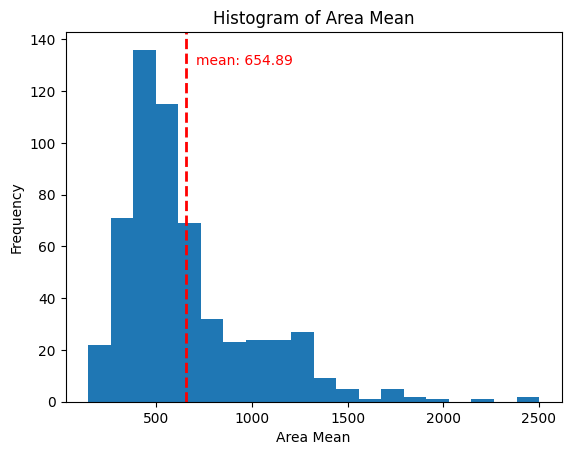

In [ ]:
plt.hist(brcancer_df['area_mean'] ,bins =20)
plt.axvline(arm, color='red', linestyle='dashed', linewidth=2)
plt.text(arm + 50, 130, f'mean: {arm:.2f}', color='red')
plt.xlabel('Area Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Area Mean')
plt.show()

In [ ]:
prm = brcancer_df['perimeter_mean'].mean()

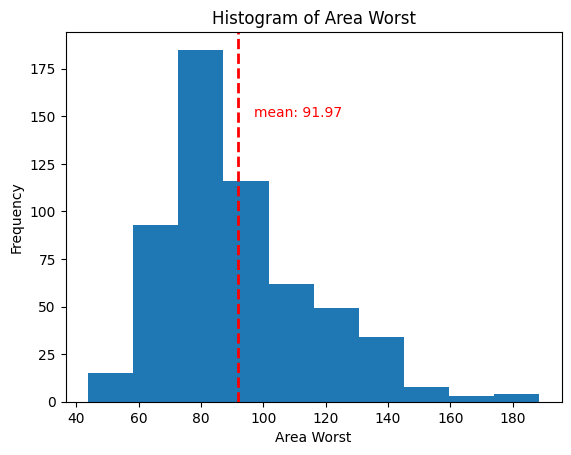

In [ ]:
plt.hist(brcancer_df['perimeter_mean'], )
plt.axvline(prm, color='red', linestyle='dashed', linewidth=2)
plt.text(prm + 5, 150, f'mean: {prm:.2f}', color='red')
plt.xlabel('Area Worst')
plt.ylabel('Frequency')
plt.title('Histogram of Area Worst')
plt.show()